<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> PROJECT 2021/2022 </center>

**GROUP 39:** <br>
- Beatriz Ferreia (20210630) <br>
- Beatriz Neto (20210608) <br>
- Diogo Marques (20210605)
- Sara Silva (20210619)


    
# 1. Imports



## 1.1. Import the Needed Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os


from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, StandardScaler, RobustScaler


import scipy.stats as stats
from scipy.stats import chi2_contingency


from sklearn.linear_model import LogisticRegression, LassoCV , RidgeCV, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif

from sklearn.naive_bayes import GaussianNB

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, RepeatedKFold

from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, mean_absolute_error, roc_auc_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

import graphviz

import pydotplus

from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, VotingClassifier

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.svm import SVC

import matplotlib.pyplot as plt

from matplotlib.legend_handler import HandlerLine2D

#!pip install pydotplus

%matplotlib inline



## 1.2. Import Datasets



In [2]:
path = 'https://raw.githubusercontent.com/beatriz-neto/Machine-Learning-2021-2022/main/data/'

website_train = pd.read_csv(path + 'train.csv')
website_train.set_index("Access_ID", inplace = True)
website_train.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [3]:
website_test = pd.read_csv(path + 'test.csv')
website_test.set_index("Access_ID", inplace = True)
website_test.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,,,,,,,
798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner



    
# 2. Explore Data
    


## 2.1. Check datatypes and missing values


In [4]:
# There are no missing values in the train dataset
website_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [5]:
# There are no missing values in the test dataset
website_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 798519314 to 962218682
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2300 non-null   object 
 1   AccountMng_Pages            2300 non-null   int64  
 2   AccountMng_Duration         2300 non-null   float64
 3   FAQ_Pages                   2300 non-null   int64  
 4   FAQ_Duration                2300 non-null   float64
 5   Product_Pages               2300 non-null   int64  
 6   Product_Duration            2300 non-null   float64
 7   GoogleAnalytics_BounceRate  2300 non-null   float64
 8   GoogleAnalytics_ExitRate    2300 non-null   float64
 9   GoogleAnalytics_PageValue   2300 non-null   float64
 10  OS                          2300 non-null   object 
 11  Browser                     2300 non-null   int64  
 12  Country                     2300 non-null   object 
 13  Type_of_Traffic     

## 2.2. Descriptive statistics for all variables


In [6]:
## Using .describe() get the descriptive statistics for all variables 

#for the Train

website_train.describe(include='all')

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
count,9999,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999,9999.000000,9999,9999.000000,9999,9999.000000
unique,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,9,NaN,3,NaN
top,25-May-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows,NaN,Portugal,NaN,Returner,NaN
freq,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5361,NaN,3870,NaN,8534,NaN
mean,NaN,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,NaN,2.352535,NaN,3.957496,NaN,0.155216
std,NaN,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,NaN,1.715698,NaN,3.675159,NaN,0.362128
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,NaN,2.000000,NaN,2.000000,NaN,0.000000
50%,NaN,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,NaN,2.000000,NaN,2.000000,NaN,0.000000
75%,NaN,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,NaN,2.000000,NaN,4.000000,NaN,0.000000


In [7]:
## Using .describe() get the descriptive statistics for all variables 

#for the test

website_test.describe(include='all')

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
count,2300,2300.0000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300,2300.000000,2300,2300.000000,2300
unique,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,9,NaN,3
top,5-May-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows,NaN,Portugal,NaN,Returner
freq,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224,NaN,895,NaN,1988
mean,NaN,2.2900,79.780933,0.486522,34.266832,31.928696,1172.039254,0.021702,0.042565,5.588465,NaN,2.366087,NaN,4.012609,NaN
std,NaN,3.2523,164.447609,1.234311,145.500683,44.150226,1702.730695,0.047214,0.047539,17.781708,NaN,1.701233,NaN,3.710291,NaN
min,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,0.0000,0.000000,0.000000,0.000000,8.000000,186.875000,0.000000,0.014275,0.000000,NaN,2.000000,NaN,2.000000,NaN
50%,NaN,1.0000,8.550000,0.000000,0.000000,18.000000,598.689300,0.002900,0.025200,0.000000,NaN,2.000000,NaN,2.000000,NaN
75%,NaN,4.0000,97.850000,0.000000,0.000000,38.000000,1439.535275,0.016750,0.050000,0.000000,NaN,2.000000,NaN,4.000000,NaN


  
## 2.3. Coherence checking
    

    


In [8]:
website_train_cohe = website_train.copy()
website_test_cohe = website_test.copy()

In [9]:
website_train_cohe['Incoherent']=0
website_test_cohe['Incoherent_t'] = 0

##### it doesn't make sense having a number of accounting management pages with duration zero

In [10]:
#Train
website_train_cohe.loc[(website_train_cohe["AccountMng_Pages"] != 0) & (website_train_cohe["AccountMng_Duration"] == 0) \
                       , 'Incoherent'] = 1

#Test
website_test_cohe.loc[(website_test_cohe["AccountMng_Pages"] != 0) & (website_test_cohe["AccountMng_Duration"] == 0) \
                       , 'Incoherent_t'] = 1

In [11]:
print(website_train_cohe['Incoherent'].value_counts())
print('\n')
print(website_test_cohe['Incoherent_t'].value_counts())

0    9886
1     113
Name: Incoherent, dtype: int64


0    2279
1      21
Name: Incoherent_t, dtype: int64


In [12]:
#Train
condition1 = ((website_train_cohe["AccountMng_Pages"] != 0) & (website_train_cohe["AccountMng_Duration"] == 0))
website_train_cohe["AccountMng_Duration"] = website_train_cohe["AccountMng_Duration"].where(~condition1)

#Test
condition4 = ((website_test_cohe["AccountMng_Pages"] != 0) & (website_test_cohe["AccountMng_Duration"] == 0))
website_test_cohe["AccountMng_Duration"] = website_test_cohe["AccountMng_Duration"].where(~condition4)

In [13]:
#Train
website_train_cohe['Incoherent']=0

#test
website_test_cohe['Incoherent_t']=0

##### it doesn't make sense having a number of FAQ pages with duration zero

In [14]:
#train
website_train_cohe.loc[(website_train_cohe["FAQ_Pages"] != 0) & (website_train_cohe["FAQ_Duration"] == 0) , 'Incoherent'] = 1

#test
website_test_cohe.loc[(website_test_cohe["FAQ_Pages"] != 0) & (website_test_cohe["FAQ_Duration"] == 0) , 'Incoherent_t'] = 1

In [15]:
print(website_train_cohe['Incoherent'].value_counts())
print('\n')
print(website_test_cohe['Incoherent_t'].value_counts())

0    9823
1     176
Name: Incoherent, dtype: int64


0    2251
1      49
Name: Incoherent_t, dtype: int64


In [16]:
#TRain
condition2 = ((website_train_cohe["FAQ_Pages"] != 0) & (website_train_cohe["FAQ_Duration"] == 0))
website_train_cohe["FAQ_Duration"] = website_train_cohe["FAQ_Duration"].where(~condition2)

#Test
condition5 = ((website_test_cohe["FAQ_Pages"] != 0) & (website_test_cohe["FAQ_Duration"] == 0))
website_test_cohe["FAQ_Duration"] = website_test_cohe["FAQ_Duration"].where(~condition5)

In [17]:
#train
website_train_cohe['Incoherent']=0

#test
website_test_cohe['Incoherent_t']=0

##### it doesn't make sense having a number of Product pages with duration zero

In [18]:
#train
website_train_cohe.loc[(website_train_cohe["Product_Pages"] != 0) & (website_train_cohe["Product_Duration"] == 0)\
                       , 'Incoherent'] = 1

#test
website_test_cohe.loc[(website_test_cohe["Product_Pages"] != 0) & (website_test_cohe["Product_Duration"] == 0)\
                       , 'Incoherent_t'] = 1

In [19]:
print(website_train_cohe['Incoherent'].value_counts())
print('\n')
print(website_test_cohe['Incoherent_t'].value_counts())

0    9404
1     595
Name: Incoherent, dtype: int64


0    2180
1     120
Name: Incoherent_t, dtype: int64


In [20]:
#TRain
condition3 = ((website_train_cohe["Product_Pages"] != 0) & (website_train_cohe["Product_Duration"] == 0))

website_train_cohe["Product_Duration"] = website_train_cohe["Product_Duration"].where(~condition3)

#test
condition6 = ((website_test_cohe["Product_Pages"] != 0) & (website_test_cohe["Product_Duration"] == 0))
website_test_cohe["Product_Duration"] = website_test["Product_Duration"].where(~condition6)

In [21]:
#train
website_train_cohe['Incoherent']=0

#test
website_test_cohe['Incoherent_t']=0

#####  we cannot have an Average bounce rate value of the pages visited by the user, provided by google analytics and have number of pages about account managament, 'FAQ_pages',  and products and services

In [22]:
#Train
website_train_cohe.loc[(website_train_cohe['AccountMng_Pages'] != 0) & (website_train_cohe['GoogleAnalytics_BounceRate'] == 0) \
                 & (website_train_cohe['FAQ_Pages'] != 0)  & (website_train_cohe['Product_Pages'] != 0), 'Incoherent'] = 1

#Test
website_test_cohe.loc[(website_test_cohe['AccountMng_Pages'] != 0) & (website_test_cohe['GoogleAnalytics_BounceRate'] == 0) \
                 & (website_test_cohe['FAQ_Pages'] != 0)  & (website_test_cohe['Product_Pages'] != 0), 'Incoherent_t'] = 1

In [23]:
print(website_train_cohe['Incoherent'].value_counts())
print('\n')
print(website_test_cohe['Incoherent_t'].value_counts())

0    9430
1     569
Name: Incoherent, dtype: int64


0    2172
1     128
Name: Incoherent_t, dtype: int64


In [24]:
#Train
condition7 = (website_train_cohe['AccountMng_Pages'] != 0) & (website_train_cohe['GoogleAnalytics_BounceRate'] == 0) \
                 & (website_train_cohe['FAQ_Pages'] != 0)  & (website_train_cohe['Product_Pages'] != 0)

website_train_cohe["GoogleAnalytics_BounceRate"] = website_train_cohe["GoogleAnalytics_BounceRate"].where(~condition7)

#Test
condition8 = (website_test_cohe['AccountMng_Pages'] != 0) & (website_test_cohe['GoogleAnalytics_BounceRate'] == 0) \
                 & (website_test_cohe['FAQ_Pages'] != 0)  & (website_test_cohe['Product_Pages'] != 0)

website_test_cohe["GoogleAnalytics_BounceRate"] = website_test_cohe["GoogleAnalytics_BounceRate"].where(~condition8)


In [25]:
#train
website_train_cohe['Incoherent']=0

#test
website_test_cohe['Incoherent_t']=0

#####  we cannot have an Average exit rate value of the pages visited by the user, provided by google analytics and have number of pages about account managament, 'FAQ_pages',  and products and services

In [26]:
#Train
website_train_cohe.loc[(website_train_cohe['AccountMng_Pages'] != 0) & (website_train_cohe['GoogleAnalytics_ExitRate'] == 0) \
                 & (website_train_cohe['FAQ_Pages'] != 0)  & (website_train_cohe['Product_Pages'] != 0), 'Incoherent'] = 1

#Test
website_test_cohe.loc[(website_test_cohe['AccountMng_Pages'] != 0) & (website_test_cohe['GoogleAnalytics_ExitRate'] == 0) \
                 & (website_test_cohe['FAQ_Pages'] != 0)  & (website_test_cohe['Product_Pages'] != 0), 'Incoherent_t'] = 1

In [27]:
print(website_train_cohe['Incoherent'].value_counts())
print('\n')
print(website_test_cohe['Incoherent_t'].value_counts())

0    9993
1       6
Name: Incoherent, dtype: int64


0    2299
1       1
Name: Incoherent_t, dtype: int64


In [28]:
#Train
condition9 = (website_train_cohe['AccountMng_Pages'] != 0) & (website_train_cohe['GoogleAnalytics_ExitRate'] == 0) \
                 & (website_train_cohe['FAQ_Pages'] != 0)  & (website_train_cohe['Product_Pages'] != 0)

website_train_cohe["GoogleAnalytics_ExitRate"] = website_train_cohe["GoogleAnalytics_ExitRate"].where(~condition9)

#Test
condition10 = (website_test_cohe['AccountMng_Pages'] != 0) & (website_test_cohe['GoogleAnalytics_ExitRate'] == 0) \
                 & (website_test_cohe['FAQ_Pages'] != 0)  & (website_test_cohe['Product_Pages'] != 0)

website_test_cohe["GoogleAnalytics_ExitRate"] = website_test_cohe["GoogleAnalytics_ExitRate"].where(~condition10)

In [29]:
print(website_train_cohe.shape)
print(website_test_cohe.shape)

(9999, 17)
(2300, 16)


In [30]:
website_train_cohe.isna().sum()

Date                            0
AccountMng_Pages                0
AccountMng_Duration           113
FAQ_Pages                       0
FAQ_Duration                  176
Product_Pages                   0
Product_Duration              595
GoogleAnalytics_BounceRate    569
GoogleAnalytics_ExitRate        6
GoogleAnalytics_PageValue       0
OS                              0
Browser                         0
Country                         0
Type_of_Traffic                 0
Type_of_Visitor                 0
Buy                             0
Incoherent                      0
dtype: int64

In [31]:
website_test_cohe.isna().sum()

Date                            0
AccountMng_Pages                0
AccountMng_Duration            21
FAQ_Pages                       0
FAQ_Duration                   49
Product_Pages                   0
Product_Duration              120
GoogleAnalytics_BounceRate    128
GoogleAnalytics_ExitRate        1
GoogleAnalytics_PageValue       0
OS                              0
Browser                         0
Country                         0
Type_of_Traffic                 0
Type_of_Visitor                 0
Incoherent_t                    0
dtype: int64

In [32]:
#train
website_train = website_train_cohe.drop(columns=['Incoherent'])

#test
website_test = website_test_cohe.drop(columns=['Incoherent_t'])

In [33]:
website_test.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor'],
      dtype='object')

# 3. Pre-processing

## 3.1. Transform datatypes

In [34]:
# Analysing the variables, we decided that it makes more sense
# to work with the variables Browser and Type_of_Traffic as categorical
# variables, so we need to convert them

website_train['Browser'] = website_train['Browser'].astype("category")
website_test['Browser'] = website_test['Browser'].astype("category")

website_train['Type_of_Traffic'] = website_train['Type_of_Traffic'].astype("category")
website_test['Type_of_Traffic'] = website_test['Type_of_Traffic'].astype("category")

print("Train:" + "\n" + str(website_train.dtypes))
print("\n" + "Test:" + "\n" + str(website_test.dtypes))

Train:
Date                            object
AccountMng_Pages                 int64
AccountMng_Duration            float64
FAQ_Pages                        int64
FAQ_Duration                   float64
Product_Pages                    int64
Product_Duration               float64
GoogleAnalytics_BounceRate     float64
GoogleAnalytics_ExitRate       float64
GoogleAnalytics_PageValue      float64
OS                              object
Browser                       category
Country                         object
Type_of_Traffic               category
Type_of_Visitor                 object
Buy                              int64
dtype: object

Test:
Date                            object
AccountMng_Pages                 int64
AccountMng_Duration            float64
FAQ_Pages                        int64
FAQ_Duration                   float64
Product_Pages                    int64
Product_Duration               float64
GoogleAnalytics_BounceRate     float64
GoogleAnalytics_ExitRate       float

## 3.2.  Defining Features

In [35]:
categorical_features = ["Date", "OS", "Browser", "Country", "Type_of_Traffic", "Type_of_Visitor"]

_list = categorical_features.copy()
_list.append("Buy")

numeric_features = list(website_train.drop(_list, axis = 1).columns.values)
numeric_features

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue']

## 3.3. Filling missing values

### 3.3.1. Data Scaling

In [36]:
website_train_scal = website_train.copy()
website_test_scal = website_test.copy()

In [37]:
# scaling train data

scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(website_train_scal[numeric_features]) # this will return an array
website_train_scal[numeric_features] = scaled_feat


In [38]:
# scaling test data

scaled_feat2 = scaler.fit_transform(website_test_scal[numeric_features]) # this will return an array
website_test_scal[numeric_features] = scaled_feat2


### 3.3.2.  KNN method for numerical features


#### Train

In [39]:
KNN_imputer = KNNImputer(n_neighbors=5, weights = "distance")

website_train_scal[numeric_features] = KNN_imputer.fit_transform(website_train_scal[numeric_features])

In [40]:
# reversing data scaling
reshaped_vals = website_train_scal[numeric_features].values.reshape(-1,1)

website_train_scal[numeric_features] = scaler.inverse_transform(website_train_scal[numeric_features])


#### Test


In [41]:
KNN_imputer = KNNImputer(n_neighbors=5, weights = "distance")

website_test_scal[numeric_features] = KNN_imputer.fit_transform(website_test_scal[numeric_features])

In [42]:
reshaped_vals = website_test_scal[numeric_features].values.reshape(-1,1)

website_test_scal[numeric_features] = scaler.inverse_transform(website_test_scal[numeric_features])

In [43]:
website_test = website_test_scal.copy()
website_train = website_train_scal.copy()

## 3.4. Feature Engineering

#### Date_day and Date_month

In [44]:
# change date

#Train
website_train['Date'] = pd.to_datetime(website_train['Date'], infer_datetime_format = True, errors = 'coerce') 

website_train['Date_year'] = website_train['Date'].dt.year
website_train['Date_month'] = website_train['Date'].dt.month
website_train['Date_day'] = website_train['Date'].dt.day

website_train.drop("Date", axis = 1, inplace = True)


#Test
website_test['Date'] = pd.to_datetime(website_test['Date'], infer_datetime_format = True, errors = 'coerce') 

website_test['Date_year'] = website_test['Date'].dt.year
website_test['Date_month'] = website_test['Date'].dt.month
website_test['Date_day'] = website_test['Date'].dt.day

website_test.drop("Date", axis = 1, inplace = True)

In [45]:
website_train['Date_year'].value_counts()

2020    9999
Name: Date_year, dtype: int64

In [46]:
# doesn't make sense to keep year as feature

website_train.drop('Date_year', axis = 1, inplace = True)
website_test.drop('Date_year', axis = 1, inplace = True)

#### Total of pages 

In [47]:
#Train
website_train['Total_Pages'] = (website_train['AccountMng_Pages'] + website_train['FAQ_Pages']\
                                + website_train['Product_Pages'] )

#Test
website_test['Total_Pages'] = (website_test['AccountMng_Pages'] + website_test['FAQ_Pages']\
                                + website_test['Product_Pages'] )

#### Total Duration

In [48]:
#Train
website_train['Total_Duration'] = (website_train['Product_Duration'] + website_train['FAQ_Duration'] +\
                                  website_train['AccountMng_Duration'])

#Test
website_test['Total_Duration'] = (website_test['Product_Duration'] + website_test['FAQ_Duration'] +\
                                  website_test['AccountMng_Duration'])

#### Users that only visited account management pages

In [49]:
#Train
website_train['AccountMng_Pages_only'] = ((website_train['AccountMng_Pages']!=0) &\
                                          (website_train['FAQ_Pages']==0) & \
                                          (website_train['Product_Pages']==0)).astype(int)


#Test
website_test['AccountMng_Pages_only'] = ((website_test['AccountMng_Pages']!=0) &\
                                          (website_test['FAQ_Pages']==0) & \
                                          (website_test['Product_Pages']==0)).astype(int)


#### Users that only visited FAQ pages

In [50]:
#Train
website_train['FAQ_only'] = ((website_train['AccountMng_Pages']==0) &\
                                          (website_train['FAQ_Pages']!=0) & \
                                          (website_train['Product_Pages']==0)).astype(int)


#Test
website_test['FAQ_only'] = ((website_test['AccountMng_Pages']==0) &\
                                          (website_test['FAQ_Pages']!=0) & \
                                          (website_test['Product_Pages']==0)).astype(int)


#### Users that only visited Products and services pages


In [51]:
#Train
website_train['Product_Pages_only'] = ((website_train['AccountMng_Pages']==0) &\
                                          (website_train['FAQ_Pages']==0) & \
                                          (website_train['Product_Pages']!=0)).astype(int)


#Test
website_test['Product_Pages_only'] = ((website_test['AccountMng_Pages']==0) &\
                                          (website_test['FAQ_Pages']==0) & \
                                          (website_test['Product_Pages']!=0)).astype(int)


#### Users that only visited Products and services  and FAQ pages


In [52]:
#Train
website_train['Product_FAQ_Pages'] = ((website_train['AccountMng_Pages']==0) &\
                                          (website_train['FAQ_Pages'] !=0) & \
                                          (website_train['Product_Pages']!=0)).astype(int)



#Test
website_test['Product_FAQ_Pages'] = ((website_test['AccountMng_Pages']==0) &\
                                          (website_test['FAQ_Pages'] !=0) & \
                                          (website_test['Product_Pages']!=0)).astype(int)

#### Users that only visited Products and account management pages


In [53]:
#Train
website_train['Product_Account_Pages'] = ((website_train['AccountMng_Pages']!=0) &\
                                          (website_train['FAQ_Pages']==0) & \
                                          (website_train['Product_Pages']!=0)).astype(int)


#Test
website_test['Product_Account_Pages'] = ((website_test['AccountMng_Pages']!=0) &\
                                          (website_test['FAQ_Pages']==0) & \
                                          (website_test['Product_Pages']!=0)).astype(int)

#### Users that only visited FAQ and account management pages

In [54]:
#Train
website_train['Account_FAQ_Pages'] = ((website_train['AccountMng_Pages']!=0) &\
                                          (website_train['FAQ_Pages']!=0) & \
                                          (website_train['Product_Pages']==0)).astype(int)


#Test
website_test['Account_FAQ_Pages'] = ((website_test['AccountMng_Pages']!=0) &\
                                          (website_test['FAQ_Pages']!=0) & \
                                          (website_test['Product_Pages']==0)).astype(int)

#### Page Value is the average value for a page that a user visited before landing on the goal page
#### If Page Value doesn't have value 0 it means that the user landed in the goal page


In [55]:
#Train
website_train['Goal_Page'] = 0
website_train.loc[(website_train['GoogleAnalytics_PageValue']==0), 'Goal_Page'] = 0 
website_train.loc[(website_train['GoogleAnalytics_PageValue']!=0), 'Goal_Page'] = 1


#Test
website_test['Goal_Page'] = 0
website_test.loc[(website_test['GoogleAnalytics_PageValue']==0), 'Goal_Page'] = 0 
website_test.loc[(website_test['GoogleAnalytics_PageValue']!=0), 'Goal_Page'] = 1

## 3.5. Check and remove outliers

   
#### Defining Features


In [56]:
numeric_features.extend(['Total_Pages', 'Total_Duration', 'Date_day', 'Date_month'])


binary_features = ["AccountMng_Pages_only", "FAQ_only", "Product_Pages_only", "Product_FAQ_Pages", "Product_Account_Pages",\
                  "Account_FAQ_Pages", "Goal_Page"]

categorical_features.remove('Date')


### 3.5.1. Numerical Variables



### 3.5.1.1.  Variable's Histograms 
    

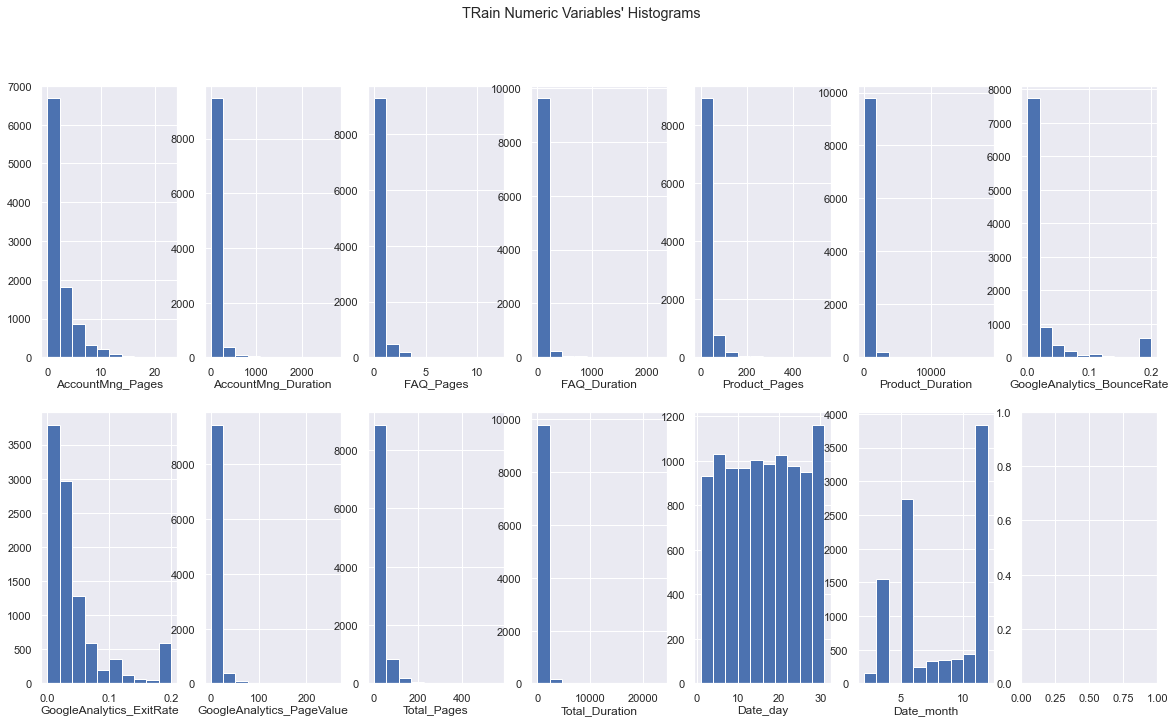

In [57]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), numeric_features): 
    ax.hist(website_train[feat])                        
    ax.set_title(feat, y=-0.13)
    
title = "TRain Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

  
### 3.5.1.2. Filtering Numerical Variables 
    


   
### A)  Manually 


In [58]:
website_train_manually = website_train.copy()

In [59]:
filters1 = (
    (website_train_manually['AccountMng_Pages'] <= 18)
    &
    (website_train_manually['AccountMng_Duration'] <= 1300)
    &
    (website_train_manually['FAQ_Pages'] <= 8)
    &
    (website_train_manually['FAQ_Duration'] <= 700) 
    &
    (website_train_manually['Product_Pages'] <= 250)
    &
    (website_train_manually['Product_Duration'] <= 18000)
    &
    (website_train_manually['GoogleAnalytics_PageValue'] <= 120))


website_train_manually = website_train_manually[filters1]

print('Percentage of train data kept after removing outliers:', np.round(website_train_manually.shape[0] / website_train.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9852


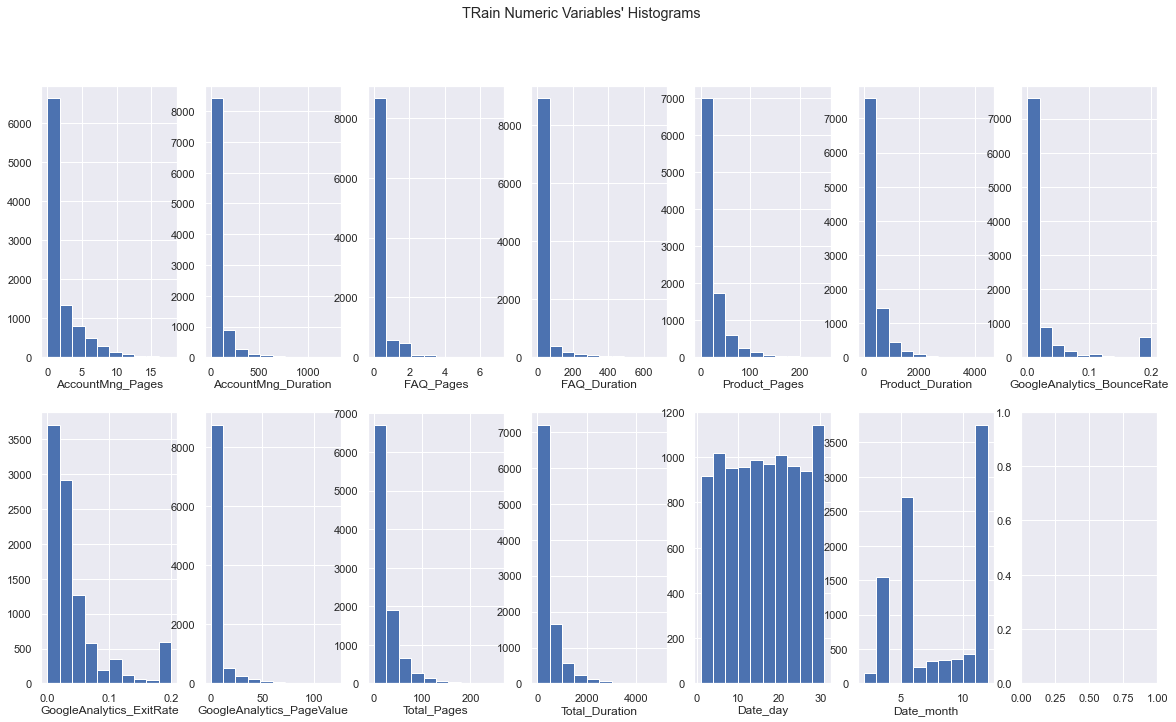

In [60]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), numeric_features): 
    ax.hist(website_train_manually[feat])                       
    ax.set_title(feat, y=-0.13)
    
title = "TRain Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

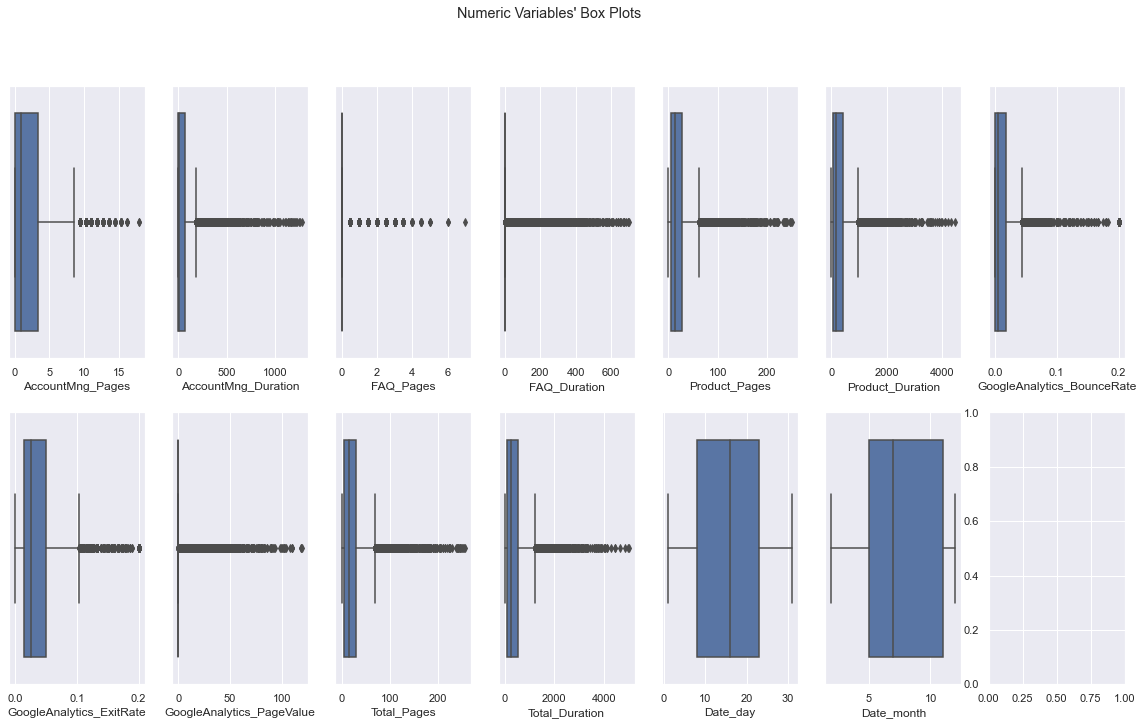

In [61]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), numeric_features): 
    sns.boxplot(website_train_manually[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


    
### B)  IQR method
    


In [62]:
website_train_iqr = website_train.copy()

In [63]:
# lot of data lost when using iqr

q25 = website_train_iqr.quantile(.25)
q75 = website_train_iqr.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 20 * iqr
lower_lim = q25 - 20 * iqr

filters3 = []
for feature in numeric_features:
    llim = lower_lim[feature]
    ulim = upper_lim[feature]
    filters3.append(website_train_iqr[feature].between(llim, ulim, inclusive=True))

filters3 = pd.Series(np.all(filters3, 0), index = website_train.index)
website_train_iqr = website_train_iqr[filters3]
print('Percentage of train data kept after removing outliers:', np.round(website_train_iqr.shape[0] / website_train.shape[0], 4))

Percentage of train data kept after removing outliers: 0.6504



    
### C)  IQR method and Manual
    


In [64]:
website_train_both = website_train.copy()

In [65]:
website_train_both = website_train_both[(filters1 | filters3)]
print('Percentage of train data kept after removing outliers:', np.round(website_train_both.shape[0] / website_train.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9859



    
### D) Z-score Method
    


In [66]:
z1 = np.abs(stats.zscore(website_train[numeric_features]))

#only keep rows in dataframe with all z-scores less than absolute value of 6
website_train_zscore = website_train[(z1 < 6).all(axis = 1)]

print('Percentage of train data kept after removing outliers:', np.round(website_train_zscore.shape[0] / website_train.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9782



    
### 3.5.2. Categorical variables
    


 
### 3.5.2.1. Analysing the variables values
    


We're going to use the dataset filtered by the IQR and Manual method because it has the highest percentage of data kept after removing outliers.

In [67]:
website_train = website_train_both.copy()

#### OS variable

In [68]:
# Chrome Os, Other, Fedora seems to be outliers, so we
# will remove the rows with these values

print("Train:" + "\n" + str(website_train["OS"].value_counts()))

print("\n" + "Test:" + "\n" + str(website_test["OS"].value_counts()))

Train:
Windows      5261
Android      2090
MacOSX       2046
iOS           372
Ubuntu         66
Chrome OS      15
Other           5
Fedora          3
Name: OS, dtype: int64

Test:
Windows      1224
MacOSX        483
Android       477
iOS            97
Ubuntu         11
Chrome OS       4
Fedora          2
Other           2
Name: OS, dtype: int64


#### Browser variable

In [69]:
# 9, 11, 12 seems to be outliers, so we
# will remove the rows with these values

print("Train:" + "\n" + str(website_train["Browser"].value_counts()))

print("\n" + "Test:" + "\n" + str(website_test["Browser"].value_counts()))

Train:
2     6376
1     1974
4      593
5      356
6      135
10     129
8      113
3       81
13      50
7       40
12       8
11       3
Name: Browser, dtype: int64

Test:
2     1457
1      468
4      138
5      104
6       35
10      33
3       24
8       21
13       8
7        7
11       2
12       2
9        1
Name: Browser, dtype: int64


#### Country Variable

In [70]:
# Seems to have no outliers

print("Train:" + "\n" + str(website_train["Country"].value_counts()))

print("\n" + "Test:" + "\n" + str(website_test["Country"].value_counts()))

Train:
Portugal          3810
Spain             1920
Brazil             932
France             908
Other              652
Italy              608
United Kingdom     421
Germany            349
Switzerland        258
Name: Country, dtype: int64

Test:
Portugal          895
Spain             451
Brazil            229
France            213
Italy             147
Other             146
Germany            84
United Kingdom     81
Switzerland        54
Name: Country, dtype: int64


#### Type_of_Traffic variable

In [71]:
# 7,9,12, 14 seems to be outliers

print("Train:" + "\n" + str(website_train["Type_of_Traffic"].value_counts()))

print("\n" + "Test:" + "\n" + str(website_test["Type_of_Traffic"].value_counts()))

Train:
2     3084
1     1991
3     1660
4      861
13     590
6      351
10     349
8      276
5      209
11     202
15     152
12      44
9       33
7       31
14      25
Name: Type_of_Traffic, dtype: int64

Test:
2     751
1     433
3     374
4     199
13    142
10     93
6      90
8      58
5      50
15     41
11     40
7       9
9       8
12      6
14      6
Name: Type_of_Traffic, dtype: int64


#### Type_of_Visitor variable

In [72]:
# Other seems to be outlier

print("Train:" + "\n" + str(website_train["Type_of_Visitor"].value_counts()))

print("\n" + "Test:" + "\n" + str(website_test["Type_of_Visitor"].value_counts()))

Train:
Returner      8407
New_Access    1379
Other           72
Name: Type_of_Visitor, dtype: int64

Test:
Returner      1988
New_Access     301
Other           11
Name: Type_of_Visitor, dtype: int64


### 3.5.2.2. Passing outliers to Nans
    


#### OS Variables

In [73]:
website_train["OS"] = website_train["OS"].replace(["Ubuntu", "Chrome OS", "Other", "Fedora"], np.nan)

website_test["OS"] = website_test["OS"].replace(["Ubuntu", "Chrome OS", "Other", "Fedora"], np.nan)

#### Browser Variable

In [74]:
website_train["Browser"] = website_train["Browser"].replace([11, 12], np.nan)
website_test["Browser"] = website_test["Browser"].replace([9, 11, 12], np.nan)

#### Type_of_Traffic Variable

In [75]:
website_train["Type_of_Traffic"] = website_train["Type_of_Traffic"].replace([7, 9, 12, 14], np.nan)

website_test["Type_of_Traffic"] = website_test["Type_of_Traffic"].replace([7, 9, 12, 14], np.nan)

#### Type_of_Visitor Variable

In [76]:
website_train["Type_of_Visitor"] = website_train["Type_of_Visitor"].replace("Other", np.nan)

website_test["Type_of_Visitor"] = website_test["Type_of_Visitor"].replace("Other", np.nan)


    
### 3.5.2.3. Mode Method (filling missing values)
    


In [77]:
# train
modes1 = website_train[categorical_features].mode().loc[0]
website_train.fillna(modes1, inplace=True)

In [78]:
# test
modes2 = website_test[categorical_features].mode().loc[0]
website_test.fillna(modes2, inplace=True)

# 4. Feature Selection


    
### Data Partition
    



In [79]:
data = website_train.copy()

In [80]:
# Define X matrix and target (y)
X = data.drop("Buy", axis = 1)
y = data["Buy"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)

In [81]:
# Define a new object named a X_train_num_bin where only the numerical and binary variables are mantained, 
# a object named as X_train_cat with all the categorical independent variables
# The same for the test data

X_train_num_bin = X_train[binary_features + numeric_features]
X_val_num_bin = X_val[binary_features + numeric_features]

X_train_cat = X_train[categorical_features]
X_val_cat = X_val[categorical_features]



### Data Scaling

In [82]:
# scaling train data

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_bin)# this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num_bin.columns).set_index(X_train.index)

In [83]:
# scaling val data

X_val_num_scaled = scaler.fit_transform(X_val_num_bin)

X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num_bin.columns).set_index(X_val.index)


## 4.1. Filter methods
    



### 4.1.1. Univariate variables
    


In [84]:
# check if any of the numerical variables is univariate (variance is equal to 0)
# It's not the case so we don't need to drop any variable

X_train_num_scaled.var()

AccountMng_Pages_only         0.001881
FAQ_only                      0.000724
Product_Pages_only            0.245216
Product_FAQ_Pages             0.032633
Product_Account_Pages         0.230797
Account_FAQ_Pages             0.000000
Goal_Page                     0.171544
AccountMng_Pages              0.023373
AccountMng_Duration           0.006760
FAQ_Pages                     0.006690
FAQ_Duration                  0.011154
Product_Pages                 0.005423
Product_Duration              0.010184
GoogleAnalytics_BounceRate    0.061900
GoogleAnalytics_ExitRate      0.061813
GoogleAnalytics_PageValue     0.009326
Total_Pages                   0.005775
Total_Duration                0.011068
Date_day                      0.085597
Date_month                    0.115288
dtype: float64



### 4.1.2. Spearman Correlation
    


In [85]:
# We are going to check now the spearman correlation between the variables. 
# First we need to create a new dataframe with all the training data, but containing 
#also the dependent variable, so we can check if any of the independent variables are 
# correlated with the target

all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

,AccountMng_Pages_only,FAQ_only,Product_Pages_only,Product_FAQ_Pages,Product_Account_Pages,Account_FAQ_Pages,Goal_Page,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,...,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Total_Pages,Total_Duration,Date_day,Date_month,Buy
Access_ID,,,,,,,,,,,,,,,,,,,,,
396223475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.047619,0.014257,0.071429,...,0.088803,0.067224,0.106500,0.1950,0.078355,0.090674,0.075126,0.333333,0.1,1
335994847,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,0.019305,0.028713,0.300000,0.3500,0.228381,0.018975,0.025653,0.766667,0.9,1
212328506,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.190476,0.062799,0.000000,...,0.009653,0.004814,0.000000,0.1110,0.000000,0.018024,0.023611,0.733333,0.8,0
259127877,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.380952,0.095213,0.285714,...,0.027027,0.021586,0.016011,0.0500,0.092288,0.048648,0.149463,0.666667,0.1,1
220174692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.095238,0.018314,0.000000,...,0.028958,0.033768,0.000000,0.0315,0.000000,0.032731,0.035801,0.800000,0.4,0


In [86]:
# Create a function to plot the correlation between the variables named cor_heatmap()
# that should take as parameters the correlation table cor

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    matrix = np.triu(cor)
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', mask = matrix)
    plt.show()

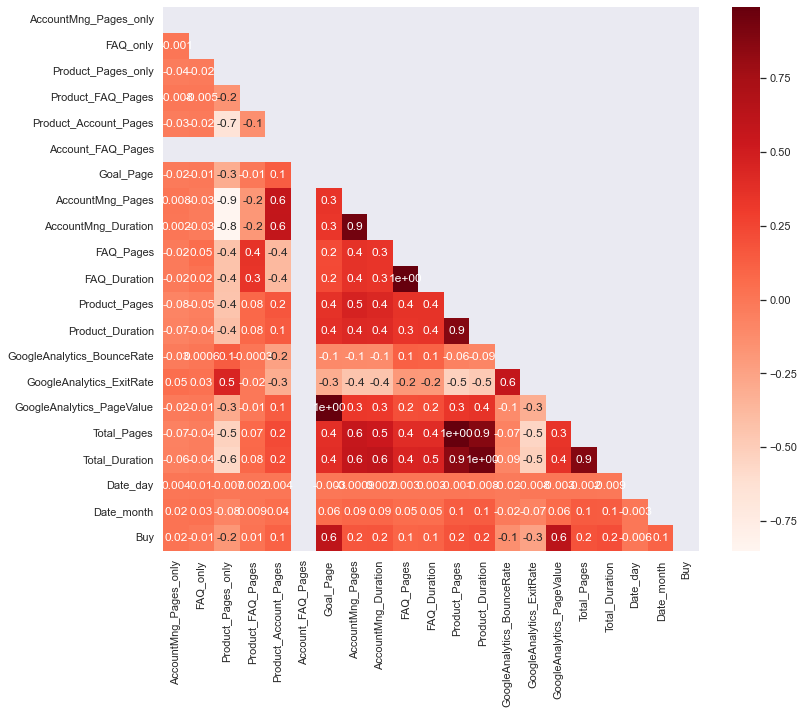

In [87]:
# analysing the histograms above the variables don't follow a normal distribution
# so we are going to use the spearman method for the correlation

cor_spearman = all_train_num.corr(method ='spearman')
cor_heatmap(cor_spearman)



### 4.1.3. ANOVA
    


In [88]:
# Create an SelectKBest object to select features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X_train_num_scaled, y_train)

In [89]:
# Show results
print('Original number of features:', X_train_num_scaled.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 20
Reduced number of features: 10


In [90]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = X_train_num_scaled.iloc[:,cols]
features_to_keep.columns

Index(['Product_Pages_only', 'Goal_Page', 'AccountMng_Pages', 'Product_Pages',
       'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Total_Pages',
       'Total_Duration'],
      dtype='object')


### 4.1.4. Chi-Square for categorical data



In [91]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [92]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var], y_train, var)

OS is IMPORTANT for Prediction
Browser is NOT an important predictor. (Discard Browser from model)
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction



## 4.2. Wrapper Methods



### 4.2.1. RFE
    


#### Logistic Model

In [93]:
#no of features
nof_list=np.arange(1,21)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    
    model = LogisticRegression()
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    
    
    model.fit(X_train_rfe, y_train)
    
    score = model.score(X_val_rfe, y_val)
    score_list.append(score)
    
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.896214


In [94]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 6)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

In [95]:
rfe.support_
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

AccountMng_Pages_only          True
FAQ_only                      False
Product_Pages_only            False
Product_FAQ_Pages             False
Product_Account_Pages         False
Account_FAQ_Pages             False
Goal_Page                      True
AccountMng_Pages               True
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Total_Pages                   False
Total_Duration                False
Date_day                      False
Date_month                     True
dtype: bool

According to RFE, the numerical variables that we should keep for the final model are `GoogleAnalytics_ExitRate` and `GoogleAnalytics_PageValue`.

#### Random Forest

In [96]:
#model = RandomForestClassifier()

#no of features
#nof_list=np.arange(1,21)            
#high_score=0
#Variable to store the optimum features
#nof=0           
#score_list =[]
#for n in range(len(nof_list)):
#    rfe = RFE(estimator=model,n_features_to_select=nof_list[n])
#    X_train_rfe = rfe.fit_transform(X_train_num_bin,y_train)
#    X_val_rfe = rfe.transform(X_val_num_bin)
#    model.fit(X_train_rfe, y_train)
    
#    score = model.score(X_val_rfe, y_val)
#    score_list.append(score)
    
#    if(score>high_score):
#        high_score = score
#        nof = nof_list[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))

In [97]:
#cols = list(X_train_num_bin.columns)

#Initializing RFE model
#rfe = RFE(estimator= model, n_features_to_select=nof)             
#Transforming data using RFE
#X_rfe = rfe.fit_transform(X_train_num_bin,y_train)  
#Fitting the data to model
#model.fit(X_rfe,y_train)              
#temp = pd.Series(rfe.support_,index = cols)
#selected_features_rfe = temp[temp==True].index
#print(selected_features_rfe)
#len(selected_features_rfe)


## 4.3. Embedded Methods
    



### 4.3.1. Lasso Regression
    


In [98]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [99]:
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)

LassoCV()

In [100]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

AccountMng_Pages_only         0.221799
FAQ_only                     -0.000000
Product_Pages_only           -0.012135
Product_FAQ_Pages             0.012931
Product_Account_Pages         0.015003
Account_FAQ_Pages             0.000000
Goal_Page                     0.401108
AccountMng_Pages             -0.181615
AccountMng_Duration          -0.000000
FAQ_Pages                    -0.054472
FAQ_Duration                  0.017742
Product_Pages                -0.000000
Product_Duration              0.079860
GoogleAnalytics_BounceRate    0.047599
GoogleAnalytics_ExitRate     -0.120405
GoogleAnalytics_PageValue     0.816237
Total_Pages                  -0.155437
Total_Duration                0.000000
Date_day                     -0.005157
Date_month                    0.080659
dtype: float64

In [101]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 15 variables and eliminated the other 5 variables


In [102]:
coef.sort_values()

AccountMng_Pages             -0.181615
Total_Pages                  -0.155437
GoogleAnalytics_ExitRate     -0.120405
FAQ_Pages                    -0.054472
Product_Pages_only           -0.012135
Date_day                     -0.005157
FAQ_only                     -0.000000
Account_FAQ_Pages             0.000000
Total_Duration                0.000000
AccountMng_Duration          -0.000000
Product_Pages                -0.000000
Product_FAQ_Pages             0.012931
Product_Account_Pages         0.015003
FAQ_Duration                  0.017742
GoogleAnalytics_BounceRate    0.047599
Product_Duration              0.079860
Date_month                    0.080659
AccountMng_Pages_only         0.221799
Goal_Page                     0.401108
GoogleAnalytics_PageValue     0.816237
dtype: float64

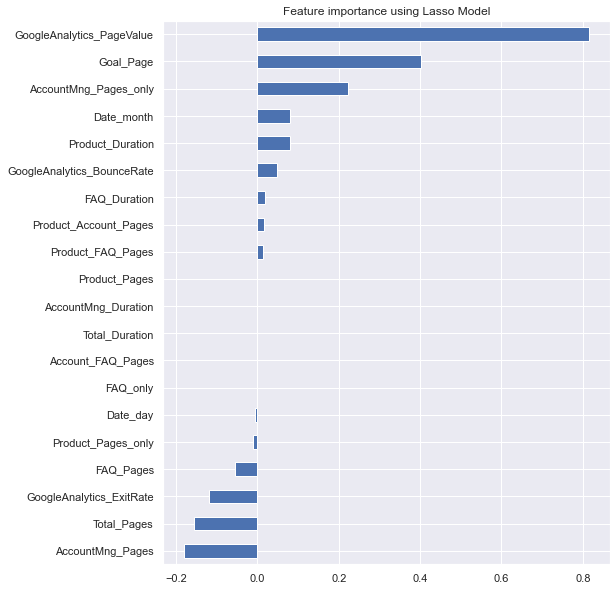

In [103]:
plot_importance(coef,'Lasso')


### 4.3.2. Ridge Regression
    


In [104]:
ridge = RidgeCV()

In [105]:
ridge.fit(X =X_train_num_scaled, y = y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [106]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 1.000000


In [107]:
print("Best score using built-in RidgeCV: %f" %ridge.score(X_train_num_scaled, y_train))

Best score using built-in RidgeCV: 0.411929


In [108]:
coef_ridge = pd.Series(ridge.coef_, index = X_train_num_scaled.columns)
coef_ridge.sort_values()

AccountMng_Pages             -0.180925
GoogleAnalytics_ExitRate     -0.140743
Total_Pages                  -0.122647
Product_Pages                -0.114787
FAQ_Pages                    -0.097574
FAQ_only                     -0.041738
AccountMng_Duration          -0.031176
Product_Pages_only           -0.014356
Date_day                     -0.005951
Account_FAQ_Pages             0.000000
Product_Account_Pages         0.012735
Product_FAQ_Pages             0.015729
FAQ_Duration                  0.031268
Total_Duration                0.064227
GoogleAnalytics_BounceRate    0.066396
Product_Duration              0.077742
Date_month                    0.081765
AccountMng_Pages_only         0.250097
Goal_Page                     0.402694
GoogleAnalytics_PageValue     0.805805
dtype: float64

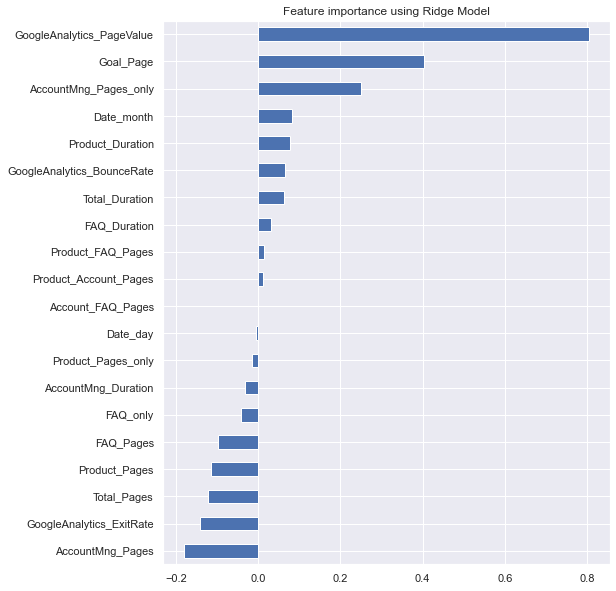

In [109]:
plot_importance(coef_ridge,'Ridge')


### 4.3.3. Gini Importance | Entropy Importance 
    


In [110]:
gini_importance = DecisionTreeClassifier().fit(X_train_num_bin, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_num_bin, y_train).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

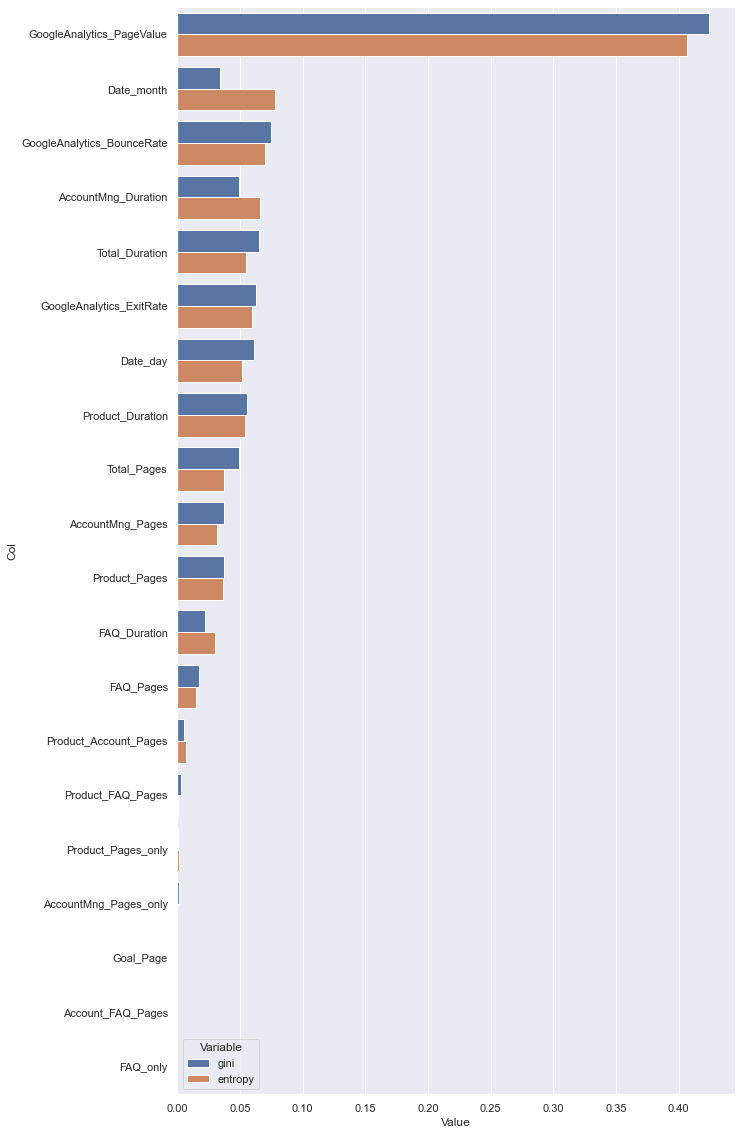

In [111]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_num_bin.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)



### 4.3.4. Tree based Classifiers
    


[1.10233774e-03 3.55869166e-05 1.53826573e-02 3.55996409e-03
 8.64889574e-03 0.00000000e+00 2.86399540e-01 4.36792261e-02
 4.12087096e-02 1.71868415e-02 1.92814865e-02 5.71316097e-02
 5.76441429e-02 5.50405075e-02 6.82115926e-02 1.05855331e-01
 5.83558229e-02 5.82080476e-02 5.34377127e-02 4.96299883e-02]


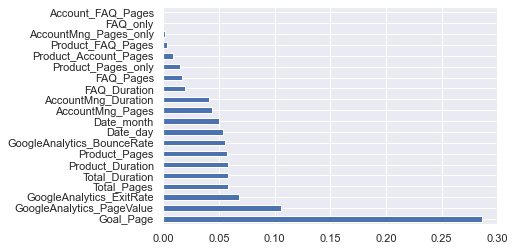

In [112]:
model = ExtraTreesClassifier()
model.fit(X_train_num_bin, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_num_bin.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()



### 4.3.5. AdaBoost Feature Importances

    


In [113]:
ab = AdaBoostClassifier(random_state = 56).fit(X_train_num_bin, y_train)

<AxesSubplot:xlabel='importances', ylabel='features'>

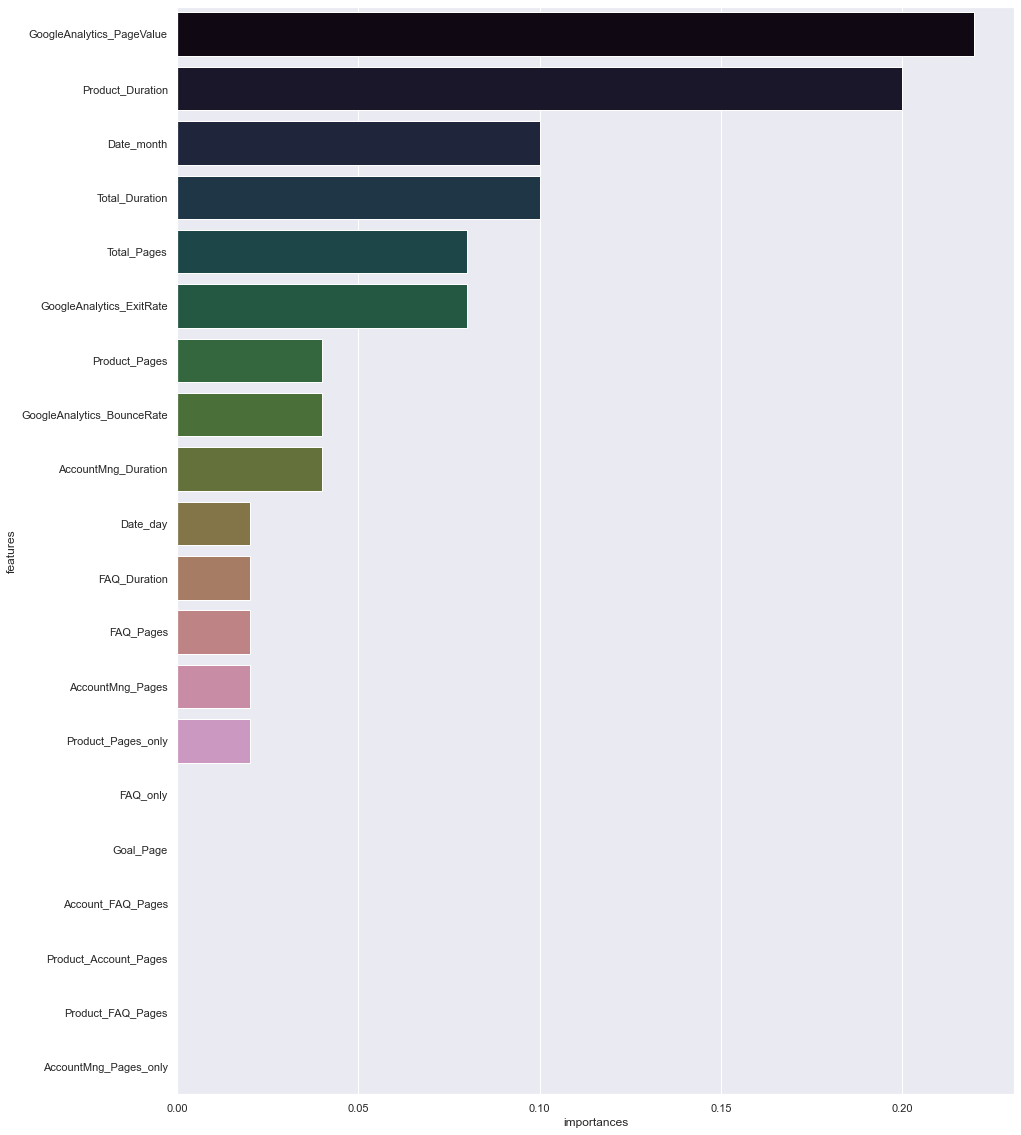

In [114]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = X_train_num_bin.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')


## Final Insights:
    


### Numerical Data

<hr>

| Predictor | Univariate | Spearman | RFE (logistic) | RFE (random forest) | Lasso | Ridge | ANOVA | Gini | Entropy | Tree based Classifiers | AdaBoost  | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- | --- | --- | --- | --- | --- | --- | --- | --- |
| AccountMng_Pages | Keep | Discard | Keep | Keep | Keep | Keep | Keep | Keep? | Keep? | Keep? | Discard  |  Try with and without |
| AccountMng_Duration | Keep | Discard | Discard | Keep | Discard | Discard | Discard | Keep? | Keep? | Keep? | Keep? | Discard |
| FAQ_Pages | Keep | Discard | Discard | Discard | Keep? | Keep? | Discard | Discard | Discard | Discard | Discard  | Discard |
| FAQ_Duration | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Keep? | Keep? | Discard | Discard | Discard |
| Product_Pages | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep? | Keep? | Keep? | Keep? | Try with and without |
| Product_Duration | Keep | Discard | Discard | Keep | Keep? | Keep? | Discard | Keep? | Keep? | Keep? | Keep  | Try With and Without |
| GoogleAnalytics_BounceRate | Keep | Discard | Discard | Keep | Keep? | Keep? | Keep | Keep? | Keep? | Keep? | Keep?  | Try With and Without |
| GoogleAnalytics_ExitRate | Keep | Discard | Keep | Keep | Keep | Keep | Keep | Keep? | Keep? | Keep? | Keep | Keep |
| GoogleAnalytics_PageValue | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep| Keep | 
| Date_month | Keep | Discard | Keep | Keep | Keep? | Keep? | Discard | Keep? | Keep? | Keep? | Keep | Try with and without |
| Date_day | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Keep? | Keep? | Keep? | Discard | Discard |
| Total_Pages | Keep | Discard | Discard | Keep | Keep | Keep | Keep | Keep? | Keep? | Keep? | Keep | Try with and without |
| Total_Duration | Keep | Discard | Discard | Keep | Discard | Keep? | Keep | Keep? | Keep? | Keep? | Keep | Try with and without |
| AccountMng_Pages_only | Keep | Discard | Keep | Discard | Keep | Keep | Discard | Discard | Discard | Discard | Discard | Discard |
| FAQ_only | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Product_Pages_only | Keep | Discard | Discard | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard | Discard |
| Product_FAQ_Pages | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Product_Account_Pages | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Account_FAQ_Pages | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Goal_Page | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Discard | Discard | Keep | Discard | Try with and without |


<hr>


### Categorical Data

| Predictor | Chi-Square |
| --- | --- |
| OS | Keep |
| Brower | Discard |
| Country | Discard |
| Type_of_Traffic | Keep |
| Type_of_Visitor | Keep |


<hr>

# 5. One Hot Encoder

In [115]:
# transform categorical variables into dummies in the train dataset
df_ohc = website_train.copy()

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[['OS', 'Type_of_Traffic', 'Type_of_Visitor']])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?

df_ohc = pd.concat([df_ohc.drop(columns=categorical_features), ohc_df], axis=1)

df_ohc.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy,...,x1_3,x1_4,x1_5,x1_6,x1_8,x1_10,x1_11,x1_13,x1_15,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
102863333,0.0,0.0,0.0,0.000000,2.272340,18.511785,0.0000,0.0667,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103117814,0.0,0.0,0.0,0.000000,17.421277,197.989324,0.0217,0.0449,0.000000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
103201891,0.0,0.0,0.0,0.000000,6.059574,27.478431,0.0250,0.0583,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103226087,0.0,0.0,0.0,0.000000,6.817021,176.078891,0.0000,0.0250,30.319054,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103234445,0.0,0.0,1.0,340.979595,27.268085,465.669645,0.0000,0.0093,8.936018,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
# # transform categorical variables into dummies in the test dataset
df_ohc_t = website_test.copy()

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc_t[['OS', 'Type_of_Traffic', 'Type_of_Visitor']])
ohc_feat_names = ohc.get_feature_names()
ohc_df_t = pd.DataFrame(ohc_feat, index=df_ohc_t.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?

df_ohc_t = pd.concat([df_ohc_t.drop(columns=categorical_features), ohc_df_t], axis=1)

df_ohc_t.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Date_month,...,x1_3,x1_4,x1_5,x1_6,x1_8,x1_10,x1_11,x1_13,x1_15,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,0.0,0.00,0.0,0.000000,86.0,5332.5478,0.0139,0.0654,0.0000,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798663101,2.0,37.50,0.0,0.000000,55.0,1420.4725,0.0012,0.0058,0.0000,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798663221,0.0,0.00,0.0,0.000000,36.0,788.5000,0.0000,0.0250,0.0000,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798760918,0.0,0.00,0.0,0.000000,2.0,689.0000,0.0000,0.1000,0.0000,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798856982,12.0,225.25,1.0,34.362377,129.0,3367.0413,0.0014,0.0185,1.0353,11,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0



# 6. Model Selection
    



### Data Partition
    


In [117]:
X = df_ohc.drop("Buy", axis = 1)
y = df_ohc["Buy"]

X_test = df_ohc_t

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 5, stratify = y, shuffle = True)


### Data Scaling
    



### A) MinMax Scaler
    


In [118]:
min_max = MinMaxScaler().fit(X_train)

min_max_X_train = pd.DataFrame(min_max.transform(X_train), columns = X_train.columns)
min_max_X_val = pd.DataFrame(min_max.transform(X_val), columns = X_val.columns)


min_max = MinMaxScaler().fit(X)

min_max_X = pd.DataFrame(min_max.transform(X), columns = X.columns)
min_max_X_test = pd.DataFrame(min_max.transform(X_test), columns = X_test.columns)


### B) Standard Scaler
    


In [119]:
std_scaler = StandardScaler().fit(X_train)

std_scaler_X_train = pd.DataFrame(std_scaler.transform(X_train), columns = X_train.columns)
std_scaler_X_val = pd.DataFrame(std_scaler.transform(X_val), columns = X_val.columns)

std_scaler = StandardScaler().fit(X)

std_scaler_X = pd.DataFrame(std_scaler.transform(X), columns = X.columns)
std_scaler_X_test = pd.DataFrame(std_scaler.transform(X_test), columns = X_test.columns)



### C) Robust Scaler
    


In [120]:
robust = RobustScaler().fit(X_train)

robust_X_train = pd.DataFrame(robust.transform(X_train), columns = X_train.columns)
robust_X_val = pd.DataFrame(robust.transform(X_val), columns = X_val.columns)

robust = RobustScaler().fit(X)

robust_X = pd.DataFrame(robust.transform(X), columns = X.columns)
robust_X_test = pd.DataFrame(robust.transform(X_test), columns = X_test.columns)

### Evaluate Model

In [121]:
# function named as evaluate_model that receives as parameters the independent variables, 
# the dependent variable and the model and returns the f1 score method result

def evaluate_model(X,y, model):
    predictions = model.predict(X)  # f1_score(y, model.fit_predict(X))
    return f1_score(y, predictions)


## 6.1. Logistic Regression

In [122]:
feat = ['AccountMng_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'Date_month', 'AccountMng_Pages_only', 'Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS']

mm_X_train_l = min_max_X_train[feat]
mm_X_val_l = min_max_X_val[feat]
mm_X_l = min_max_X[feat]

ss_X_train_l = std_scaler_X_train[feat]
ss_X_val_l = std_scaler_X_val[feat]
ss_X_l = std_scaler_X[feat]

r_X_train_l = robust_X_train[feat]
r_X_val_l = robust_X_val[feat]

ss_X_test_l = std_scaler_X_test[feat]
mm_X_test_l = min_max_X_test[feat]

In [123]:
# with min max scaler

mm_l = LogisticRegression().fit(mm_X_train_l, y_train)
print('Train: ' + str(evaluate_model(mm_X_train_l, y_train, mm_l)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_l, y_val, mm_l)))

Train: 0.6410767696909272
Val: 0.6422018348623852


In [124]:
# with standard scaler

ss_l = LogisticRegression().fit(ss_X_train_l, y_train)
print('Train: ' + str(evaluate_model(ss_X_train_l, y_train, ss_l)) + '\n' + 'Val: ' + str(evaluate_model(ss_X_val_l, y_val, ss_l)))

Train: 0.6429644466700051
Val: 0.6473988439306358


In [125]:
roc_auc_score(y_val, ss_l.predict_proba(ss_X_val_l)[:, 1])

0.9011181109744157

In [126]:
f1_lr = f1_score(y_val, ss_l.predict(ss_X_val_l))

In [127]:
# with robust scaler

r_l = LogisticRegression().fit(r_X_train_l, y_train)
print('Train: ' + str(evaluate_model(r_X_train_l, y_train, r_l)) + '\n' + 'Val: ' + str(evaluate_model(r_X_val_l, y_val, r_l)))

Train: 0.6397984886649873
Val: 0.6427745664739885


## 6.2. Naive Bayes

In [128]:
feat = ['GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 
        'GoogleAnalytics_PageValue', 'Goal_Page', 'x0_MacOSX', 'x0_Windows', 
        'x0_iOS', 'x2_Returner']

X_train_nb = X_train[feat]
X_val_nb = X_val[feat]

X_nb = X[feat]

X_test_nb = X_test[feat]

In [129]:
# it's not distance based so the data doesn't need to be scaled
nb = GaussianNB().fit(X_train_nb, y_train)
print('Train: ' + str(evaluate_model(X_train_nb, y_train, nb)) + '\n' + 'Val: ' + str(evaluate_model(X_val_nb, y_val, nb)))

Train: 0.6690590111642742
Val: 0.6482504604051565


In [130]:
roc_auc_score(y_val, nb.predict_proba(X_val_nb)[:, 1])

0.8819496098286219

In [131]:
f1_nb = f1_score(y_val, nb.predict(X_val_nb))

## 6.3. Instance Based Learning (KN Classifier)

In [132]:
feat = ['Product_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Goal_Page']

mm_X_train_kn = min_max_X_train[feat]
mm_X_val_kn = min_max_X_val[feat]
mm_X_kn = min_max_X[feat]

ss_X_train_kn = std_scaler_X_train[feat]
ss_X_val_kn = std_scaler_X_val[feat]

r_X_train_kn = robust_X_train[feat]
r_X_val_kn = robust_X_val[feat]

mm_X_test_kn = min_max_X_test[feat]

In [133]:
# for min max scaled data
# see the number of neighbors that we will use

numberK_list=np.arange(1,40)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(mm_X_train_kn, y_train)
    
    y_pred_train = model.predict(mm_X_train_kn)
    y_pred_val = model.predict(mm_X_val_kn)
    
    score_train = f1_score(y_train, y_pred_train)
    score_val = f1_score(y_val, y_pred_val)
    
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean f1 score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean f1 score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 31
Mean f1 score in train with 31 neighbors: 0.674615
Mean f1 score in validation with 31 neighbors: 0.652124


In [134]:
kn_mm = KNeighborsClassifier(n_neighbors = 31).fit(mm_X_train_kn, y_train)
print('Train: ' + str(evaluate_model(mm_X_train_kn, y_train, kn_mm)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_kn, y_val, kn_mm)))

Train: 0.674615002483855
Val: 0.6521239954075776


In [135]:
roc_auc_score(y_val, kn_mm.predict_proba(mm_X_val_kn)[:, 1])

0.9195631389537233

In [136]:
f1_kn = f1_score(y_val, kn_mm.predict(mm_X_val_kn))

In [137]:
# for standard scaled data
# see the number of neighbors that we will use

numberK_list=np.arange(1,40)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(ss_X_train_kn, y_train)
    
    y_pred_train = model.predict(ss_X_train_kn)
    y_pred_val = model.predict(ss_X_val_kn)
    
    score_train = f1_score(y_train, y_pred_train)
    score_val = f1_score(y_val, y_pred_val)
    
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean f1 score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean f1 score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 25
Mean f1 score in train with 25 neighbors: 0.665333
Mean f1 score in validation with 25 neighbors: 0.659013


In [138]:
kn_ss = KNeighborsClassifier(n_neighbors = 25).fit(ss_X_train_kn, y_train)
print('Train: ' + str(evaluate_model(ss_X_train_kn, y_train, kn_ss)) + '\n' + 'Val: ' + str(evaluate_model(ss_X_val_kn, y_val, kn_ss)))

Train: 0.6653326663331666
Val: 0.6590126291618829


In [139]:
# for robust scaled data
# see the number of neighbors that we will use

numberK_list=np.arange(1,40)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(r_X_train_kn, y_train)
    
    y_pred_train = model.predict(r_X_train_kn)
    y_pred_val = model.predict(r_X_val_kn)
    
    score_train = f1_score(y_train, y_pred_train)
    score_val = f1_score(y_val, y_pred_val)
    
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean f1 score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean f1 score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 21
Mean f1 score in train with 21 neighbors: 0.651777
Mean f1 score in validation with 21 neighbors: 0.657895


In [140]:
kn_r = KNeighborsClassifier(n_neighbors = 21).fit(r_X_train_kn, y_train)
print('Train: ' + str(evaluate_model(r_X_train_kn, y_train, kn_r)) + '\n' + 'Val: ' + str(evaluate_model(r_X_val_kn, y_val, kn_r)))

Train: 0.6517766497461929
Val: 0.6578947368421052


## 6.4. Decision Trees Classifier

In [141]:
feat = ['Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month']

X_train_dt = X_train[feat]
X_val_dt = X_val[feat]

In [142]:
dt=DecisionTreeClassifier(random_state = 56,max_leaf_nodes = 2).fit(X_train_dt, y_train)


In [143]:
dt=DecisionTreeClassifier(random_state = 56, criterion = 'entropy', max_leaf_nodes = 2).fit(X_train_dt, y_train)

In [144]:
print('Train: ' + str(evaluate_model(X_train_dt, y_train, dt)) + '\n' + 'Val: ' + str(evaluate_model(X_val_dt, y_val, dt)))

Train: 0.6666666666666667
Val: 0.6485507246376812


In [145]:
roc_auc_score(y_val, dt.predict_proba(X_val_dt)[:, 1])

0.8380605258712412

In [146]:
f1_dt = f1_score(y_val, dt.predict(X_val_dt))

## 6.5. Neural Networks (MLP Classifier)

In [147]:
feat = ['AccountMng_Pages',
       'Product_Duration', 
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS']

mm_X_train_nn = min_max_X_train[feat]
mm_X_val_nn = min_max_X_val[feat]
mm_X_nn = min_max_X[feat]

ss_X_train_nn = std_scaler_X_train[feat]
ss_X_val_nn = std_scaler_X_val[feat]
ss_X_nn = std_scaler_X[feat]

r_X_train_nn = robust_X_train[feat]
r_X_val_nn = robust_X_val[feat]
r_X_nn = robust_X[feat]

mm_X_test_nn = min_max_X_test[feat]
ss_X_test_nn = std_scaler_X_test[feat]
r_X_test_nn = robust_X_test[feat]

In [148]:
nn_mm = MLPClassifier(random_state = 56).fit(mm_X_train_nn, y_train)

In [149]:
print('Train: ' + str(evaluate_model(mm_X_train_nn, y_train, nn_mm)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_nn, y_val, nn_mm)))

Train: 0.684971098265896
Val: 0.6742081447963801


In [150]:
roc_auc_score(y_val, nn_mm.predict_proba(mm_X_val_nn)[:, 1])

0.9229545299768188

In [151]:
f1_mlp = f1_score(y_val, nn_mm.predict(mm_X_val_nn))

In [152]:
nn_ss = MLPClassifier(random_state=56).fit(ss_X_train_nn, y_train)

In [153]:
print('Train: ' + str(evaluate_model(ss_X_train_nn, y_train, nn_ss)) + '\n' + 'Val: ' + str(evaluate_model(ss_X_val_nn, y_val, nn_ss)))

Train: 0.699853587115666
Val: 0.6620370370370371


In [154]:
nn_r = MLPClassifier(random_state=56).fit(r_X_train_nn, y_train)

In [155]:
print('Train: ' + str(evaluate_model(r_X_train_nn, y_train, nn_r)) + '\n' + 'Val: ' + str(evaluate_model(r_X_val_nn, y_val, nn_r)))

Train: 0.6523605150214593
Val: 0.6285714285714287


## 6.6. AdaBoost Classifier

In [156]:
feat= ['Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Total_Duration', 'Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS', 'x2_Returner']

X_train_ab = X_train[feat]
X_val_ab = X_val[feat]

X_ab = X[feat]

X_test_ab = X_test[feat]

In [157]:
ab = AdaBoostClassifier(random_state=56)

In [158]:
params= {'learning_rate':list(np.linspace(0.1, 0.9, 9, endpoint=True)),
         'n_estimators':list(range(1,20))}

In [159]:
#grid_ab = GridSearchCV(estimator = ab, param_grid = params, n_jobs = -1, scoring = 'f1')
#grid_ab.fit(X_ab, y)

In [160]:
#grid_ab.best_params_

In [161]:
ab = AdaBoostClassifier(n_estimators = 3, learning_rate = 0.1, random_state = 56).fit(X_train_ab, y_train)
print('Train: ' + str(evaluate_model(X_train_ab, y_train, ab)) + '\n' + 'Val: ' + str(evaluate_model(X_val_ab, y_val, ab)))

Train: 0.6672019269369731
Val: 0.6494464944649447


In [162]:
roc_auc_score(y_val, ab.predict_proba(X_val_ab)[:, 1])

0.8394942055813567

In [163]:
f1_ab = f1_score(y_val, ab.predict(X_val_ab))

## 6.7. Gradient Boosting

In [164]:
feat = ['Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Total_Duration','x0_MacOSX',
       'x0_Windows', 'x0_iOS', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15', 'x2_Returner']


X_train_gb = X_train[feat]
X_val_gb = X_val[feat]

X_gb = X[feat]

X_test_gb = X_test[feat]

In [165]:
gb = GradientBoostingClassifier(random_state=56)

In [166]:
params= {'learning_rate':[0.7, 0.8, 0.9, 1.0],
        'n_estimators':[2,5,10,15,20],
        'subsample':[0.6,0.8,0.9,1.0],
        'max_features':[2,0.5,'sqrt','log2',None],
        'min_samples_split':[2,3,4]
        }

In [167]:
#grid_gb = GridSearchCV(estimator = gb, param_grid = params, n_jobs = -1, scoring = 'f1')
#grid_gb.fit(X_gb, y)

In [168]:
#grid_gb.best_params_

In [169]:
gb = GradientBoostingClassifier(learning_rate = 0.7, max_features = 0.5, min_samples_split = 2, n_estimators = 2, subsample =0.8, random_state=56).fit(X_train_gb, y_train)

In [170]:
print('Train: ' + str(evaluate_model(X_train_gb, y_train, gb)) + '\n' + 'Val: ' + str(evaluate_model(X_val_gb, y_val, gb)))

Train: 0.6802463287541449
Val: 0.6415094339622642


In [171]:
roc_auc_score(y_val, gb.predict_proba(X_val_gb)[:, 1])

0.9034304833384484

In [172]:
f1_gb = f1_score(y_val, gb.predict(X_val_gb))

## 6.8. Random Forest Classifier

In [173]:
feat=['Product_Duration', 
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Goal_Page', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15']

X_train_rf = X_train[feat]
X_val_rf = X_val[feat]
X_rf = X[feat]

X_test_rf = X_test[feat]

In [174]:
rf = RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56).fit(X_train_rf, y_train)

In [175]:
print('Train: ' + str(evaluate_model(X_train_rf, y_train, rf)) + '\n' + 'Val: ' + str(evaluate_model(X_val_rf, y_val, rf)))

Train: 0.701844262295082
Val: 0.6778443113772455


In [176]:
roc_auc_score(y_val, rf.predict_proba(X_val_rf)[:, 1])

0.9266590132993472

In [177]:
f1_rf = f1_score(y_val, rf.predict(X_val_rf))

## 6.9. Bagging Classifier

In [178]:
feat = ['Product_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Goal_Page']

mm_X_train_kn = min_max_X_train[feat]
mm_X_val_kn = min_max_X_val[feat]
mm_X_kn = min_max_X[feat]

mm_X_test_kn = min_max_X_test[feat]

In [179]:
knn = KNeighborsClassifier(n_neighbors = 31)


In [180]:
b_knn = BaggingClassifier(base_estimator = knn, random_state=56)

In [181]:
params= {'bootstrap':[True, False],
         'bootstrap_features':[True, False],
         'n_estimators':[2,5,10,15,20],
         'max_samples':[0.1,0.2,0.4,0.6,0.8,1.0],
         'max_features':[0.1,0.2,0.4,0.6,0.8,1.0],
         }

In [182]:
#grid_b_knn = GridSearchCV(estimator = b_knn, param_grid = params, n_jobs = -1, scoring = 'f1')
#grid_b_knn.fit(mm_X_kn, y)

In [183]:
#grid_b_knn.best_params_

In [184]:
b_knn = BaggingClassifier(base_estimator = knn, bootstrap = True, bootstrap_features = False, n_estimators = 20, max_samples = 0.2, max_features = 1.0, random_state=56).fit(mm_X_train_kn, y_train)
print('Train: ' + str(evaluate_model(mm_X_train_kn, y_train, b_knn)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_kn, y_val, b_knn)))

Train: 0.6752411575562701
Val: 0.6602357984994641


In [185]:
feat = ['AccountMng_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'Date_month', 'AccountMng_Pages_only', 'Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS']

mm_X_train_l = min_max_X_train[feat]
mm_X_val_l = min_max_X_val[feat]
mm_X_l = min_max_X[feat]

mm_X_test_l = min_max_X_test[feat]

In [186]:
lr = LogisticRegression()

In [187]:
b_lr = BaggingClassifier(base_estimator = lr, random_state=56)

In [188]:
#grid_b_lr = GridSearchCV(estimator = b_lr, param_grid = params, n_jobs = -1, scoring = 'f1')
#grid_b_lr.fit(mm_X_l, y)

In [189]:
#grid_b_lr.best_params_

In [190]:
b_lr = BaggingClassifier(base_estimator = lr, bootstrap = False, bootstrap_features = False, n_estimators = 2, max_samples = 0.1, max_features = 0.8, random_state=56).fit(mm_X_train_l, y_train)
print('Train: ' + str(evaluate_model(mm_X_train_l, y_train, b_lr)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_l, y_val, b_lr)))

Train: 0.6639344262295082
Val: 0.6483050847457626


In [191]:
feat=['Product_Duration', 
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Goal_Page', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15']

X_train_b_rf = X_train[feat]
X_val_b_rf = X_val[feat]
X_b_rf = X[feat]

X_test_b_rf = X_test[feat]

In [192]:
rf = RandomForestClassifier(n_estimators = 20, max_depth = 5,random_state=56)

In [193]:
b_rf = BaggingClassifier(base_estimator = rf,random_state=56).fit(X_train_b_rf, y_train)

In [194]:
print('Train: ' + str(evaluate_model(X_train_b_rf, y_train, b_rf)) + '\n' + 'Val: ' + str(evaluate_model(X_val_b_rf, y_val, b_rf)))

Train: 0.6850152905198776
Val: 0.6810035842293908


In [195]:
roc_auc_score(y_val, b_rf.predict_proba(X_val_b_rf)[:, 1])

0.9273196911176422

In [196]:
f1_bc = f1_score(y_val, b_rf.predict(X_val_b_rf))

## 6.10. Stacking Classifier

In [197]:
feat=['Product_Duration', 
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Goal_Page', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15']
X_train_sc = X_train[feat]
X_val_sc = X_val[feat]

X_sc = X[feat]
X_test_sc = X_test[feat]

In [198]:
estimators1 = [('rf', RandomForestClassifier(n_estimators = 100, max_depth = 5,random_state=56)),('nb', GaussianNB())]
sc1 = StackingClassifier(estimators=estimators1, final_estimator=RandomForestClassifier(n_estimators = 100, max_depth = 5,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc1)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc1)))

Train: 0.6929212362911266
Val: 0.6805555555555556


In [199]:
estimators2 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('nb', GaussianNB())]
sc2 = StackingClassifier(estimators=estimators2, final_estimator=RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc2)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc2)))

Train: 0.6982005141388175
Val: 0.6738095238095237


In [200]:
roc_auc_score(y_val, sc2.predict_proba(X_val_sc)[:, 1])

0.9246769798444623

In [201]:
f1_sc = f1_score(y_val, sc2.predict(X_val_sc))

In [202]:
estimators3 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('gb', GradientBoostingClassifier(random_state=56))]
sc3 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc3)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc3)))

Train: 0.7133159268929503
Val: 0.6755126658624849


In [203]:
estimators4 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 5,random_state=56)),('nb', GaussianNB()), ('gb', GradientBoostingClassifier(random_state=56))]
sc4 = StackingClassifier(estimators=estimators4, final_estimator= RandomForestClassifier(n_estimators = 40, max_depth = 5,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc4)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc4)))

Train: 0.7093198992443325
Val: 0.6822977725674091


## 6.11. Voting Classifier

In [204]:
feat=['Product_Duration', 
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages', 'Goal_Page', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15']

X_train_v = X_train[feat]
X_val_v = X_val[feat]

X_v = X[feat]
X_test_v = X_test[feat]

In [205]:
estimators = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('nb', GaussianNB())]
v1 = VotingClassifier(estimators = estimators).fit(X_train_v, y_train)

print('Train: ' + str(evaluate_model(X_train_v, y_train, v1)) + '\n' + 'Val: ' + str(evaluate_model(X_val_v, y_val, v1)))

Train: 0.6795608991113434
Val: 0.6583541147132168


In [206]:
estimators = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 4,random_state=56)),('nb', GaussianNB()), ('gb', GradientBoostingClassifier(random_state=56))]
v2 = VotingClassifier(estimators = estimators).fit(X_train_v, y_train)

print('Train: ' + str(evaluate_model(X_train_v, y_train, v2)) + '\n' + 'Val: ' + str(evaluate_model(X_val_v, y_val, v2)))

Train: 0.7040229885057473
Val: 0.6696528555431132


In [207]:
f1_vc = f1_score(y_val, v2.predict(X_val_v))

## 6.12. Support Vector Machine

In [208]:
feat = ['AccountMng_Pages', 
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Date_month',
       'Total_Pages',  'Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15']

mm_X_train_svm = min_max_X_train[feat]
mm_X_val_svm = min_max_X_val[feat]

ss_X_train_svm = std_scaler_X_train[feat]
ss_X_val_svm = std_scaler_X_val[feat]

r_X_train_svm = robust_X_train[feat]
r_X_val_svm = robust_X_val[feat]

In [209]:
# with min max scaler

svc_mm = SVC(random_state=56).fit(mm_X_train_svm, y_train)

print('Train: ' + str(evaluate_model(mm_X_train_svm, y_train, svc_mm)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_svm, y_val, svc_mm)))

Train: 0.6785714285714286
Val: 0.6496674057649667


In [210]:
# with standard scaler
svc_ss = SVC(random_state=56).fit(ss_X_train_svm, y_train)

print('Train: ' + str(evaluate_model(ss_X_train_svm, y_train, svc_ss)) + '\n' + 'Val: ' + str(evaluate_model(ss_X_val_svm, y_val, svc_ss)))

Train: 0.691721686135094
Val: 0.6619385342789598


In [211]:
f1_svc = f1_score(y_val, svc_ss.predict(ss_X_val_svm))

In [212]:
# with robust scaler
svc_r = SVC(kernel = 'linear', random_state=56).fit(r_X_train_svm, y_train)

print('Train: ' + str(evaluate_model(r_X_train_svm, y_train, svc_r)) + '\n' + 'Val: ' + str(evaluate_model(r_X_val_svm, y_val, svc_r)))

Train: 0.6629834254143646
Val: 0.6602972399150744


## 6.13. Ridge Classifier

In [213]:
feat = ['AccountMng_Pages', 
       'Product_Pages',  'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 
       'Total_Pages', 'Total_Duration', 
       'Product_Pages_only','Goal_Page', 'x0_MacOSX',
       'x0_Windows', 'x0_iOS', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_8',
       'x1_10', 'x1_11', 'x1_13', 'x1_15', 'x2_Returner']

mm_X_train_r = X_train[feat]
mm_X_val_r = X_val[feat]

ss_X_train_r = std_scaler_X_train[feat]
ss_X_val_r = std_scaler_X_val[feat]

r_X_train_r = robust_X_train[feat]
r_X_val_r = robust_X_val[feat]

In [214]:
# with min max scaler
rc_mm = RidgeClassifier().fit(mm_X_train_r, y_train)

print('Train: ' + str(evaluate_model(mm_X_train_r, y_train, rc_mm)) + '\n' + 'Val: ' + str(evaluate_model(mm_X_val_r, y_val, rc_mm)))

Train: 0.653121902874133
Val: 0.6506849315068494


In [215]:
f1_rc = f1_score(y_val, rc_mm.predict(mm_X_val_r))

In [216]:
# with standard scaler
rc_ss = RidgeClassifier().fit(ss_X_train_r, y_train)

print('Train: ' + str(evaluate_model(ss_X_train_r, y_train, rc_ss)) + '\n' + 'Val: ' + str(evaluate_model(ss_X_val_r, y_val, rc_ss)))

Train: 0.6498015873015873
Val: 0.6498277841561424


In [217]:
# with robust scaler
rc_r = RidgeClassifier().fit(r_X_train_r, y_train)

print('Train: ' + str(evaluate_model(ss_X_train_r, y_train, rc_r)) + '\n' + 'Val: ' + str(evaluate_model(r_X_val_r, y_val, rc_r)))

Train: 0.6457399103139013
Val: 0.6475315729047071


## 6.14. Passive Aggressive Classifier

In [218]:
feat = ['AccountMng_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 
        'Date_month','x0_MacOSX', 'x0_Windows', 'x0_iOS', 'x1_2', 'x1_3', 
        'x1_4', 'x1_5', 'x1_6', 'x1_8','x1_10', 'x1_11', 'x1_13', 'x1_15',
        'x2_Returner']

X_train_pa = X_train[feat]
X_val_pa = X_val[feat]

In [219]:
pa = PassiveAggressiveClassifier(random_state = 56).fit(X_train_pa, y_train)

In [220]:
print('Train: ' + str(evaluate_model(X_train_pa, y_train, pa)) + '\n' + 'Val: ' + str(evaluate_model(X_val_pa, y_val, pa)))

Train: 0.6600896860986547
Val: 0.6618257261410788


In [221]:
f1_pa = f1_score(y_val, pa.predict(X_val_pa))

# 7. Models Comparison

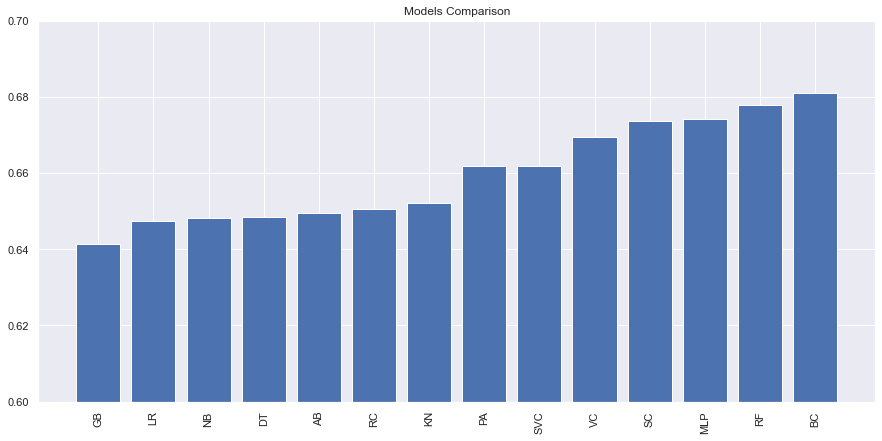

In [222]:
f1_scores = [f1_lr, f1_nb, f1_kn, f1_dt, f1_mlp, f1_ab, f1_gb, f1_rf, f1_bc, f1_sc, f1_svc, f1_vc, f1_rc, f1_pa]
models = ['LR', 'NB', 'KN', 'DT', 'MLP','AB', 'GB', 'RF', 'BC', 'SC', 'SVC', 'VC', 'RC', 'PA']
data_tuples = list(zip(models, f1_scores))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.xticks(rotation=90)
plt.ylim(0.6, 0.7)
plt.title('Models Comparison')
plt.show()

# 8. Final Model

In [223]:
estimators = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('nb', GaussianNB())]
final_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, final_model)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, final_model)))

Train: 0.6982005141388175
Val: 0.6738095238095237


In [224]:
roc_auc_score(y_val, final_model.predict(X_val_sc))

0.7926064226374577

In [225]:
final_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)).fit(X_sc, y)
y_pred = final_model.predict(X_test_sc)
kaggle_submission = pd.DataFrame(y_pred, columns = ["Buy"], index = X_test.index)
kaggle_submission

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,1
...,...
962042726,0
962063064,0
962147749,1


In [226]:
#kaggle_submission.to_csv('Group39_Version94.csv')
#kaggle: 0.70329

In [227]:
kaggle_submission['Buy'].value_counts()

0    1980
1     320
Name: Buy, dtype: int64

In [228]:
test_dataset = pd.concat([X_test_sc, kaggle_submission], axis = 1)
test_dataset.head()

,Product_Duration,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Date_month,Total_Pages,Goal_Page,x1_2,x1_3,x1_4,x1_5,x1_6,x1_8,x1_10,x1_11,x1_13,x1_15,Buy
Access_ID,,,,,,,,,,,,,,,,,
798519314,5332.5478,0.0654,0.0000,8,86.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
798663101,1420.4725,0.0058,0.0000,5,57.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
798663221,788.5000,0.0250,0.0000,11,36.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
798760918,689.0000,0.1000,0.0000,5,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
798856982,3367.0413,0.0185,1.0353,11,142.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [229]:
test_dataset.groupby('Buy')['Product_Duration'].mean()

Buy
0    1023.060893
1    2106.399927
Name: Product_Duration, dtype: float64

In [230]:
test_dataset.groupby('Buy')['GoogleAnalytics_ExitRate'].mean()

Buy
0    0.046607
1    0.017617
Name: GoogleAnalytics_ExitRate, dtype: float64

In [231]:
test_dataset.groupby('Buy')['GoogleAnalytics_PageValue'].mean()

Buy
0     0.779315
1    35.345080
Name: GoogleAnalytics_PageValue, dtype: float64

In [232]:
test_dataset.groupby(['Buy','Date_month'])['Date_month'].count()

Buy  Date_month
0    2              29
     3             319
     5             566
     6              48
     7              85
     8              76
     9              69
     10             94
     11            429
     12            265
1    2               2
     3              34
     5              66
     6               3
     7               8
     8              10
     9              18
     10             19
     11            114
     12             46
Name: Date_month, dtype: int64

In [233]:
test_dataset.groupby('Buy')['Total_Pages'].mean()

Buy
0    30.682323
1    59.596875
Name: Total_Pages, dtype: float64

In [234]:
test_dataset.groupby(['Buy','Goal_Page'])['Goal_Page'].count()

Buy  Goal_Page
0    0            1808
     1             172
1    1             320
Name: Goal_Page, dtype: int64